<a href="https://colab.research.google.com/github/aldonat/SIB_BISA-AI-Academy/blob/main/Artificial_Intellegent_Classification_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SKIN CANCER CLASSIFICATION**

#**Download Dataset**

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [04:37<00:00, 23.0MB/s]
100% 5.20G/5.20G [04:37<00:00, 20.1MB/s]


In [ ]:
!unzip skin-cancer-mnist-ham10000.zip -d '/content/drive/MyDrive/SERTIFIKASI/Skin Cancer'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/drive/MyDrive/SERTIFIKASI/Skin Cancer/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/drive/MyD

#**Import Library**

In [1]:
import os
import random
import math
import shutil
from glob import glob
from shutil import copyfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#**Preparation Data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/drive/MyDrive/SERTIFIKASI/Skin Cancer','*', '*.jpg'))}

df['path']=df['image_id'].map(image_path.get)
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...


Pengelompokan Image Berdasarkan Label ke dalam Direktori Organized

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/content/drive/MyDrive/SERTIFIKASI/Skin Cancer...


In [ ]:
import os
import pandas as pd

# Set directory for the capstone project
capstone_dir = '/content/drive/MyDrive/SERTIFIKASI/reorganized'
os.makedirs(capstone_dir, exist_ok=True)

# Read CSV file (assuming the CSV file path is provided)

data = df

# Create a directory for each label in the capstone directory
labels = data['dx'].unique()
for label in labels:
    label_dir = os.path.join(capstone_dir, str(label))
    os.makedirs(label_dir, exist_ok=True)

# Move images to the corresponding directories
for i, row in data.iterrows():
    label = row['dx']
    image_path = row['path']

    # Determine the new directory and file name
    new_dir = os.path.join(capstone_dir, str(label))
    new_filename = os.path.basename(image_path)
    new_path = os.path.join(new_dir, new_filename)

    # Copy the image file to the new directory
    os.system(f'cp "{image_path}" "{new_path}"')


Check the number of datasets

In [ ]:
base_dir_ori = "/content/drive/MyDrive/SERTIFIKASI/Skin Cancer"
label = ['HAM10000_images_part_1','HAM10000_images_part_2']
list_ori_dir = [base_dir_ori+"/"+lb for lb in label]
for i in range(len(label)):
  print("Data {} : {}".format(label[i], len(os.listdir(list_ori_dir[i]))))

Data HAM10000_images_part_1 : 5000
Data HAM10000_images_part_2 : 5015


In [ ]:
base_dir_ori = "/content/drive/MyDrive/SERTIFIKASI/reorganized"
label = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
list_ori_dir = [base_dir_ori+"/"+lb for lb in label]
for i in range(len(label)):
  print("Data {} : {}".format(label[i], len(os.listdir(list_ori_dir[i]))))

Data akiec : 327
Data bcc : 514
Data bkl : 1099
Data df : 115
Data mel : 1113
Data nv : 6705
Data vasc : 142


#Balancing Dataset

In [ ]:
import os
import shutil
import random
from PIL import Image
import numpy as np

base_dir_ori = "/content/drive/MyDrive/SERTIFIKASI/reorganized"
label = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
list_ori_dir = [base_dir_ori + "/" + lb for lb in label]

# Create the balanced dataset directory
base_dir_bal = "/content/drive/MyDrive/SERTIFIKASI/balanced"
if not os.path.exists(base_dir_bal):
    os.makedirs(base_dir_bal)

target_samples = 500

for i, lb in enumerate(label):
    ori_dir = list_ori_dir[i]
    bal_dir = os.path.join(base_dir_bal, lb)
    if not os.path.exists(bal_dir):
        os.makedirs(bal_dir)

    # Get the list of files in the original directory
    files = os.listdir(ori_dir)
    num_files = len(files)

    if num_files == target_samples:
        # Copy all samples if already balanced
        for src_file in files:
            dst_file = os.path.join(bal_dir, src_file)
            shutil.copy(os.path.join(ori_dir, src_file), dst_file)
    elif num_files < target_samples:
        # Augment samples to reach 500
        for _ in range(target_samples - num_files):
            src_file = random.choice(files)
            img = Image.open(os.path.join(ori_dir, src_file))

            # Apply data augmentation techniques
            angle = random.randint(-20, 20)
            img = img.rotate(angle)
            img = np.array(img)

            # Save the augmented image
            dst_file = os.path.join(bal_dir, f"{len(os.listdir(bal_dir))}-{src_file}")
            Image.fromarray(img.astype(np.uint8)).save(dst_file)
    else:
        # Randomly select 500 samples
        selected_files = random.sample(files, target_samples)
        for src_file in selected_files:
            dst_file = os.path.join(bal_dir, src_file)
            shutil.copy(os.path.join(ori_dir, src_file), dst_file)

# Ensure all classes have exactly 500 samples
for lb in label:
    bal_dir = os.path.join(base_dir_bal, lb)
    num_files = len(os.listdir(bal_dir))
    if num_files < target_samples:
        # Augment samples to reach 500
        for _ in range(target_samples - num_files):
            src_file = random.choice(os.listdir(bal_dir))
            img = Image.open(os.path.join(bal_dir, src_file))

            # Apply data augmentation techniques
            angle = random.randint(-20, 20)
            img = img.rotate(angle)
            img = np.array(img)

            # Save the augmented image
            dst_file = os.path.join(bal_dir, f"{len(os.listdir(bal_dir))}-{src_file}")
            Image.fromarray(img.astype(np.uint8)).save(dst_file)
    elif num_files > target_samples:
        # Randomly remove excess samples
        excess_files = random.sample(os.listdir(bal_dir), num_files - target_samples)
        for file_to_remove in excess_files:
            os.remove(os.path.join(bal_dir, file_to_remove))

print("Balancing complete. The balanced dataset is saved in:", base_dir_bal)

Balancing complete. The balanced dataset is saved in: /content/drive/MyDrive/SERTIFIKASI/balanced


In [ ]:
base_dir_ori = "/content/drive/MyDrive/SERTIFIKASI/balanced"
label = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
list_ori_dir = [base_dir_ori+"/"+lb for lb in label]
for i in range(len(label)):
  print("Data {} : {}".format(label[i], len(os.listdir(list_ori_dir[i]))))

Data akiec : 500
Data bcc : 500
Data bkl : 500
Data df : 500
Data mel : 500
Data nv : 500
Data vasc : 500


#Preparation of split by configuring directories

In [2]:
base_dir = "/content/drive/MyDrive/SERTIFIKASI/split8:2"
train_dir = base_dir + "/train"
test_dir = base_dir + "/test"
val_dir = base_dir + "/val"

try:
  # Create directory
  os.mkdir(base_dir)
  for par_dir in [train_dir, test_dir, val_dir]:
    os.mkdir(par_dir)
    for ch_dir in [par_dir+"/"+lb for lb in label]:
      os.mkdir(ch_dir)
  print("\nCreate directory successfully!")
except OSError as e:
  print("\nUnable create directory. {}".format(e))

In [ ]:
split = {
         'train' : 0.8,
         'test' : 0.10,
         'val' : 0.10
         }

def split_data(list_class_dir, train_dir, test_dir, val_dir, dict_split, label):
  # Split data for each class
  for idx_lb,class_dir in enumerate(list_class_dir):
    list_img = os.listdir(class_dir)
    list_img = random.sample(list_img, len(list_img))
    if (dict_split['train']+dict_split['test']+dict_split['val']==1.0):
      num_val = math.floor(dict_split['val'] * len(list_img))
      num_test = math.floor(dict_split['test'] * len(list_img))
      num_train = len(list_img) - num_val - num_test
      for i in range(len(list_img)):
        # Check image
        size_file_img = os.path.getsize(class_dir+"/"+list_img[i])
        if (size_file_img == 0):
          continue
        if (i < num_val):
          # Copy to val dir
          dest_dir = val_dir
        elif (i >= num_val and i < num_val + num_test):
          # Copy to test dir
          dest_dir = test_dir
        else:
          # Copy to train dir
          dest_dir = train_dir
        try:
          copyfile(class_dir+"/"+list_img[i], dest_dir+"/"+label[idx_lb]+"/"+list_img[i])
        except IOError as e:
          return "Unable to copy file. {}".format(e)
    else:
      return "Incorrect data split!"

    print("{} : train({}), test({}), val({})".format(
        label[idx_lb],
        len(os.listdir(train_dir+"/"+label[idx_lb])),
        len(os.listdir(test_dir+"/"+label[idx_lb])),
        len(os.listdir(val_dir+"/"+label[idx_lb]))
    ))

In [ ]:
split_data(
    list_class_dir=[base_dir_ori+"/"+lb for lb in label],
    train_dir=train_dir,
    test_dir=test_dir,
    val_dir=val_dir,
    dict_split=split,
    label=label
)

akiec : train(400), test(50), val(50)
bcc : train(400), test(50), val(50)
bkl : train(400), test(50), val(50)
df : train(400), test(50), val(50)
mel : train(400), test(50), val(50)
nv : train(400), test(50), val(50)
vasc : train(400), test(50), val(50)


Transform Dataset

In [3]:
batch_train = 32
batch_val = 16
batch_test = 16
size_input = (224, 224)

#Normalisasi pada data validasi
val_datagen = ImageDataGenerator(rescale=1./255.)

Augmentation

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Load Dataset

In [5]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=batch_train,
    class_mode='categorical',
    target_size=size_input
)

# Test Generator
test_generator = val_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=batch_test,
    class_mode='categorical',
    target_size=size_input
)

# Val Generator
val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    batch_size=batch_val,
    class_mode='categorical',
    target_size=size_input
)

Found 2800 images belonging to 7 classes.
Found 350 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


#Visualize Data

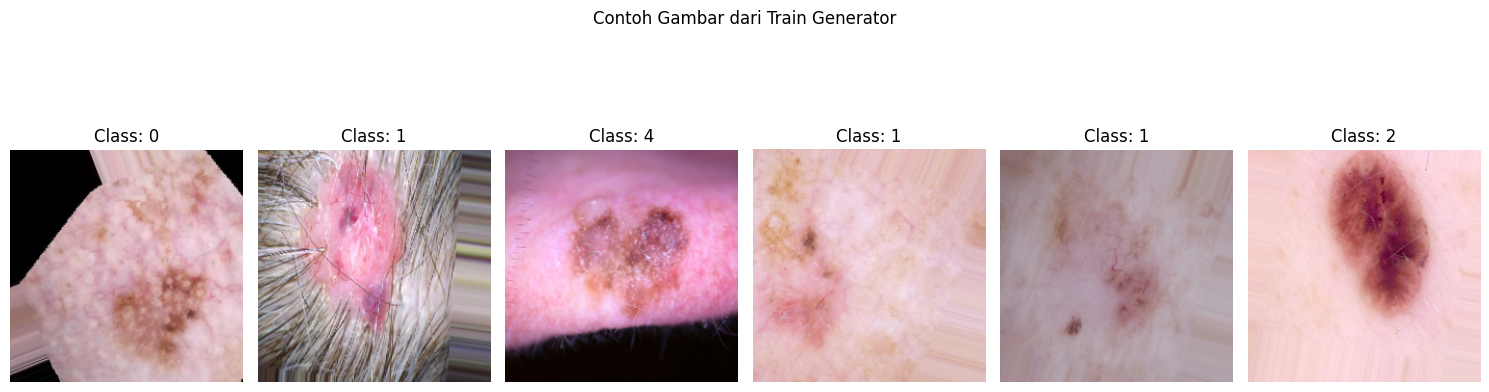

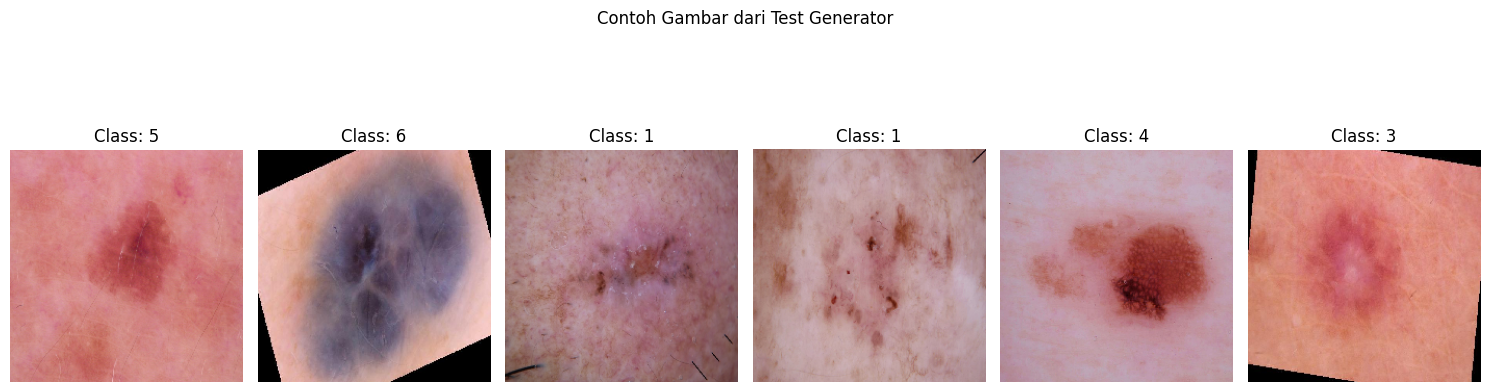

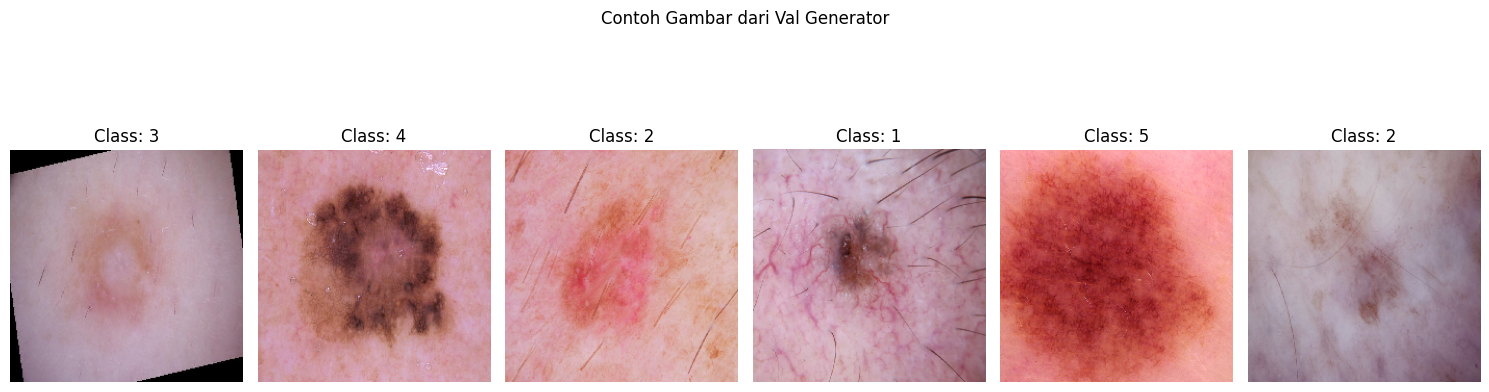

In [6]:
def plot_images(generator, title):
    x_batch, y_batch = next(generator)  # Ambil satu batch gambar
    plt.figure(figsize=(15, 5))
    for i in range(6):  # Tampilkan 6 gambar dalam satu baris
        plt.subplot(1, 6, i + 1)
        plt.imshow(x_batch[i])
        plt.title(f'Class: {y_batch[i].argmax()}')
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualisasi data dari masing-masing generator dalam satu baris
plot_images(train_generator, title='Contoh Gambar dari Train Generator')
plot_images(test_generator, title='Contoh Gambar dari Test Generator')
plot_images(val_generator, title='Contoh Gambar dari Val Generator')

#**Define Model with Basic CNN and DNN**

In [7]:

# Basic Neural Network
model = tf.keras.models.Sequential([
    # CNN
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=size_input+(3,)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

**Training Model**

In [8]:
history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1
)

Epoch 1/30
88/88 [==============================] - 52s 538ms/step - loss: 1.6410 - acc: 0.3550 - val_loss: 1.3705 - val_acc: 0.4257
Epoch 2/30
88/88 [==============================] - 48s 553ms/step - loss: 1.2226 - acc: 0.4546 - val_loss: 1.2737 - val_acc: 0.4514
Epoch 3/30
88/88 [==============================] - 48s 541ms/step - loss: 1.1209 - acc: 0.5096 - val_loss: 1.2683 - val_acc: 0.4714
Epoch 4/30
88/88 [==============================] - 48s 540ms/step - loss: 1.1111 - acc: 0.5254 - val_loss: 1.1431 - val_acc: 0.5343
Epoch 5/30
88/88 [==============================] - 48s 543ms/step - loss: 1.0149 - acc: 0.5550 - val_loss: 1.0815 - val_acc: 0.5629
Epoch 6/30
88/88 [==============================] - 48s 541ms/step - loss: 1.0059 - acc: 0.5614 - val_loss: 1.0966 - val_acc: 0.5429
Epoch 7/30
88/88 [==============================] - 48s 548ms/step - loss: 0.9463 - acc: 0.5882 - val_loss: 1.0130 - val_acc: 0.5714
Epoch 8/30
88/88 [==============================] - 48s 546ms/step - 

**Plot Accuracy and Lose**

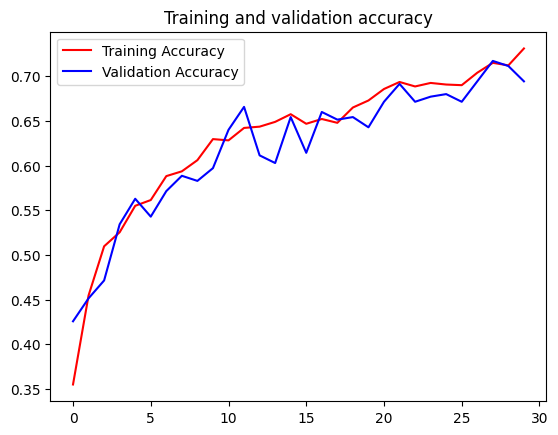

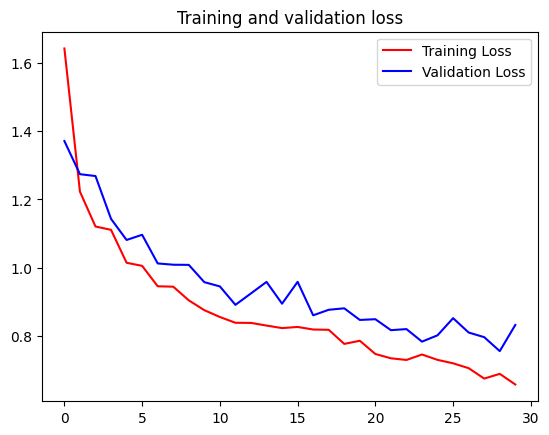

In [9]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Test Acuracy Model**

In [10]:
result = model.evaluate(test_generator, steps=len(test_generator))

22/22 [==============================] - 2s 103ms/step - loss: 0.7823 - acc: 0.7114


#**Improve Model with Transfer Learning (with MobileNet v2)**

**Create and Train Model**

In [11]:
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=size_input+(3,),
    include_top=False
)

In [12]:
# Unfreeze the base model
base_model.trainable = True

In [13]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(7, activation='softmax')]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 7)                 8967      
                                                                 
Total params: 2266951 (8.65 MB)
Trainable params: 2232839 (8.52 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5), # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1
)

Epoch 1/30
88/88 [==============================] - 75s 553ms/step - loss: 1.8617 - categorical_accuracy: 0.2914 - val_loss: 2.0237 - val_categorical_accuracy: 0.2829
Epoch 2/30
88/88 [==============================] - 48s 548ms/step - loss: 1.3243 - categorical_accuracy: 0.5486 - val_loss: 1.9575 - val_categorical_accuracy: 0.3200
Epoch 3/30
88/88 [==============================] - 48s 549ms/step - loss: 1.0382 - categorical_accuracy: 0.6432 - val_loss: 1.9087 - val_categorical_accuracy: 0.3343
Epoch 4/30
88/88 [==============================] - 48s 548ms/step - loss: 0.8828 - categorical_accuracy: 0.6918 - val_loss: 1.8278 - val_categorical_accuracy: 0.3429
Epoch 5/30
88/88 [==============================] - 48s 549ms/step - loss: 0.7748 - categorical_accuracy: 0.7268 - val_loss: 1.7165 - val_categorical_accuracy: 0.3857
Epoch 6/30
88/88 [==============================] - 48s 548ms/step - loss: 0.7089 - categorical_accuracy: 0.7568 - val_loss: 1.6991 - val_categorical_accuracy: 0.394

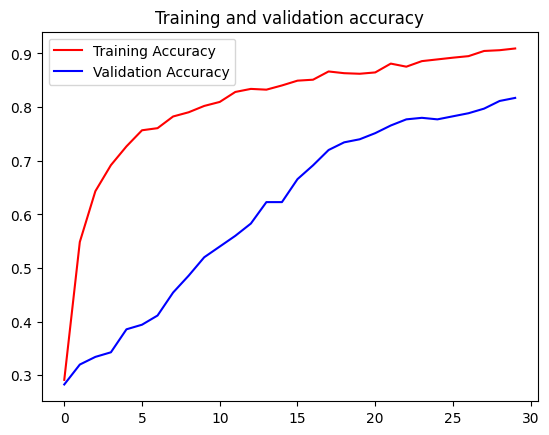

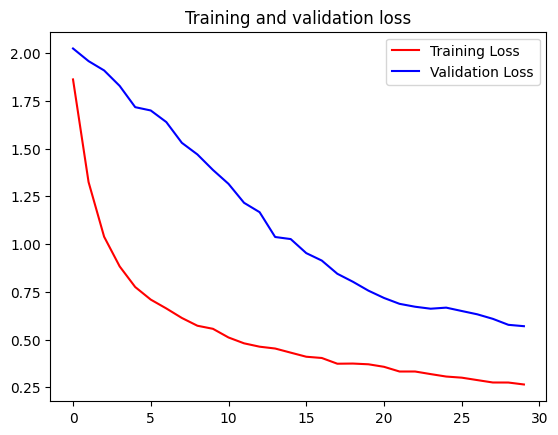

In [15]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
result = model.evaluate(test_generator, steps=len(test_generator))

22/22 [==============================] - 2s 102ms/step - loss: 0.6267 - categorical_accuracy: 0.7657


In [17]:
new_test_generator = val_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=batch_test,
    class_mode='categorical',
    target_size=size_input,
    shuffle=False # important part
)
new_test_generator.classes

Found 350 images belonging to 7 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

In [18]:
predictions = model.predict(new_test_generator, steps=len(new_test_generator))

22/22 [==============================] - 3s 106ms/step


In [19]:
# [FIXED] Problem order classes with set shuffle=False in test_generator
predictions_lb = np.argmax(predictions,axis=1)

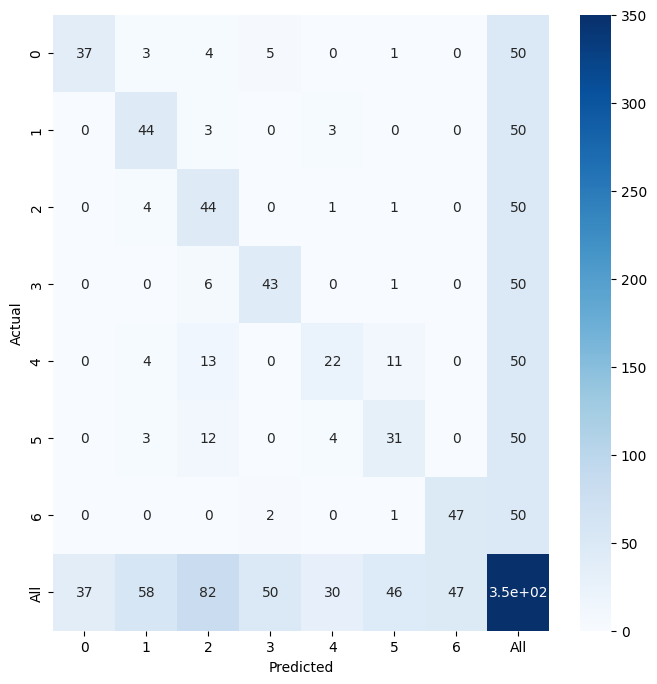

In [20]:
labels = new_test_generator.classes
import seaborn as sns
data = {'y_Actual': labels,
        'y_Predicted': predictions_lb
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, cmap="Blues", annot=True)
plt.show()

In [21]:
label=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
from sklearn import metrics
report = metrics.classification_report(
    labels,
    predictions_lb,
    target_names=label
)
print(report)

              precision    recall  f1-score   support

       akiec       1.00      0.74      0.85        50
         bcc       0.76      0.88      0.81        50
         bkl       0.54      0.88      0.67        50
          df       0.86      0.86      0.86        50
         mel       0.73      0.44      0.55        50
          nv       0.67      0.62      0.65        50
        vasc       1.00      0.94      0.97        50

    accuracy                           0.77       350
   macro avg       0.79      0.77      0.77       350
weighted avg       0.79      0.77      0.77       350

